<a href="https://colab.research.google.com/github/ARJUN108-verma/Internship-at-Gudsky-Research-Foundation/blob/main/5_Multiple_Linear_Regression_Predicting_with_Multiple_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple Linear Regression: Predicting with Multiple Features


In [72]:
#Introduction & Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Load dataset
df = pd.read_csv("/content/students-performance-in-exams.csv")

In [74]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [76]:
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


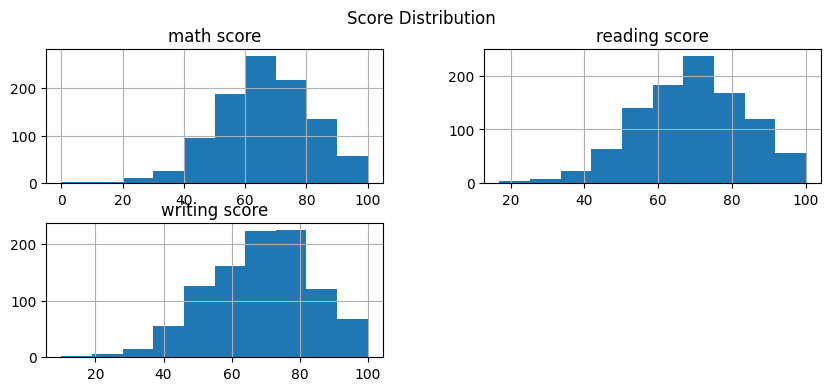

In [77]:
#Data Exploration
# Histograms of scores
df[['math score','reading score','writing score']].hist(figsize=(10,4))
plt.suptitle("Score Distribution")
plt.show()

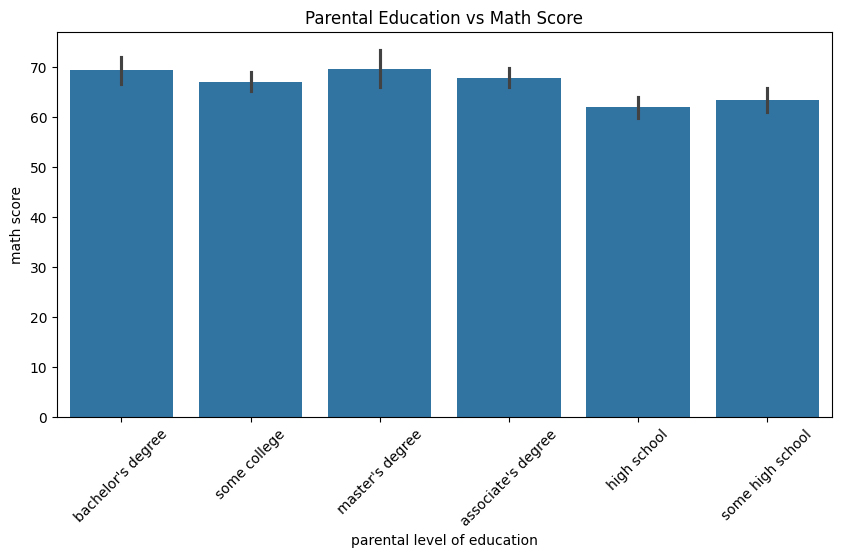

In [78]:
# Bar plot: parental education vs math score
plt.figure(figsize=(10,5))
sns.barplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title("Parental Education vs Math Score")
plt.show()

In [79]:
# Gender vs mean scores
print("\nMean scores by gender:\n", df.groupby('gender')[['math score','reading score','writing score']].mean())


Mean scores by gender:
         math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


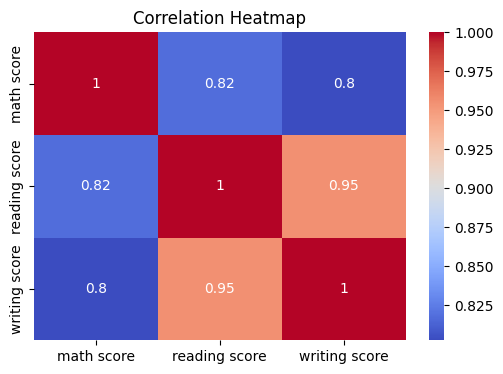

In [80]:
#Correlation Analysis
corr = df[['math score','reading score','writing score']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [81]:
#Feature Selection
# Target variable
y = df['math score']

In [82]:
# Selected features
X = df[['reading score', 'writing score', 'gender', 'lunch',
        'test preparation course', 'parental level of education']]


In [83]:
# Check first few rows
print("Selected features:\n", X.head())
print("\nTarget variable:\n", y.head())

Selected features:
    reading score  writing score  gender         lunch test preparation course  \
0             72             74  female      standard                    none   
1             90             88  female      standard               completed   
2             95             93  female      standard                    none   
3             57             44    male  free/reduced                    none   
4             78             75    male      standard                    none   

  parental level of education  
0           bachelor's degree  
1                some college  
2             master's degree  
3          associate's degree  
4                some college  

Target variable:
 0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64


In [84]:
#Encoding Categorical Variables
df_encoded = pd.get_dummies(df, columns=['gender','lunch','test preparation course','parental level of education'], drop_first=True)
print("\nEncoded columns:\n", df_encoded.head())


Encoded columns:
   race/ethnicity  math score  reading score  writing score  gender_male  \
0        group B          72             72             74        False   
1        group C          69             90             88        False   
2        group B          90             95             93        False   
3        group A          47             57             44         True   
4        group C          76             78             75         True   

   lunch_standard  test preparation course_none  \
0            True                          True   
1            True                         False   
2            True                          True   
3           False                          True   
4            True                          True   

   parental level of education_bachelor's degree  \
0                                           True   
1                                          False   
2                                          False   
3              

In [85]:
# Convert categorical variables into numeric
X_encoded = pd.get_dummies(X, drop_first=True)

# Check the encoded columns
print(X_encoded.head())

   reading score  writing score  gender_male  lunch_standard  \
0             72             74        False            True   
1             90             88        False            True   
2             95             93        False            True   
3             57             44         True           False   
4             78             75         True            True   

   test preparation course_none  \
0                          True   
1                         False   
2                          True   
3                          True   
4                          True   

   parental level of education_bachelor's degree  \
0                                           True   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   parental level of education_high school  \
0                                    False   

In [86]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [87]:
#Model Training
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [90]:
#Model Coefficients
coeff_df = pd.DataFrame(lr.coef_, X_encoded.columns, columns=['Coefficient'])
print("\nModel Coefficients:\n", coeff_df)
print("\nIntercept:", lr.intercept_)


Model Coefficients:
                                                Coefficient
reading score                                     0.294750
writing score                                     0.673354
gender_male                                      13.056626
lunch_standard                                    3.587218
test preparation course_none                      2.932931
parental level of education_bachelor's degree    -0.686297
parental level of education_high school           0.652560
parental level of education_master's degree      -1.697964
parental level of education_some college          0.844976
parental level of education_some high school      0.465562

Intercept: -10.760708167050907


In [91]:
#Model Predictions
y_pred = lr.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nFirst 10 predictions:\n", pred_df.head(10))


First 10 predictions:
      Actual  Predicted
521      91  77.669672
737      53  58.692604
740      80  78.128003
660      74  77.924413
411      84  83.713969
678      81  79.856705
626      69  65.349717
513      54  53.019766
859      87  75.227082
136      51  49.872712


In [92]:
#Model Evaluation (R²)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
print("\nR² score:", r2)


R² score: 0.8817100023084021


In [93]:
#Model Evaluation (Errors)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 4.228794806475736, MSE: 28.78449877427711, RMSE: 5.365118710175676


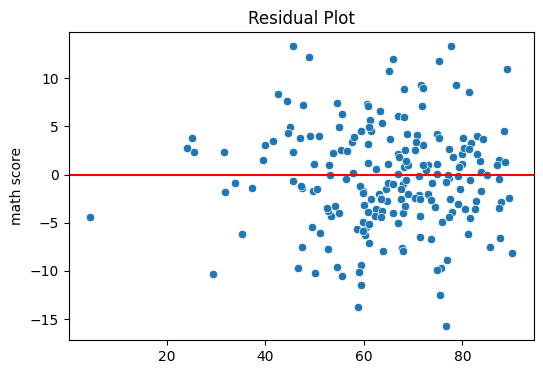

In [94]:
#Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.title("Residual Plot")
plt.show()

In [103]:
#Detecting Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select features
X = df[['reading score', 'writing score', 'gender', 'lunch',
        'test preparation course', 'parental level of education']]

# Ensure numeric type
X_encoded = X_encoded.astype(float)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]

print("VIF Data:\n", vif_data)


VIF Data:
                                          feature         VIF
0                                  reading score  295.397887
1                                  writing score  285.081426
2                                    gender_male    1.875701
3                                 lunch_standard    3.106561
4                   test preparation course_none    2.656059
5  parental level of education_bachelor's degree    1.526666
6        parental level of education_high school    1.722831
7    parental level of education_master's degree    1.280326
8       parental level of education_some college    1.905893
9   parental level of education_some high school    1.647022


In [109]:
# Handling multicollinearity
# If VIF > 10 for a feature (e.g., writing score), we can drop it
X_encoded_reduced = X_encoded.drop('writing score', axis=1)
print("\nFeatures after dropping high-VIF column:\n", X_encoded_reduced.head())


Features after dropping high-VIF column:
    reading score  gender_male  lunch_standard  test preparation course_none  \
0             72        False            True                          True   
1             90        False            True                         False   
2             95        False            True                          True   
3             57         True           False                          True   
4             78         True            True                          True   

   parental level of education_bachelor's degree  \
0                                           True   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   parental level of education_high school  \
0                                    False   
1                                    False   
2                              

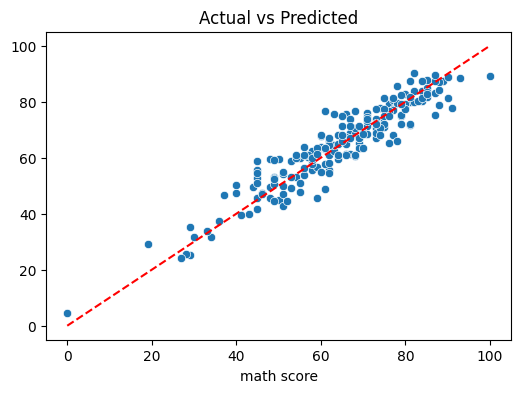

In [110]:
#Visualization
# Actual vs Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted")
plt.show()

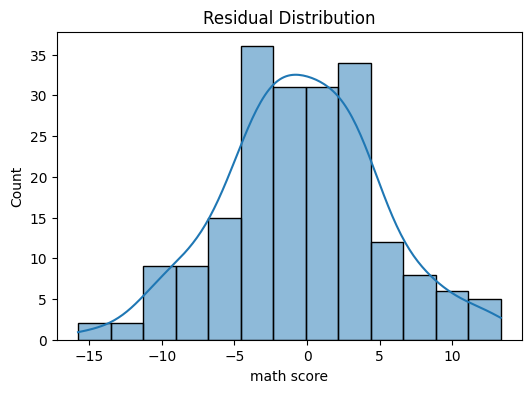

In [111]:
# Residual histogram
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

In [112]:
#Feature Importance
coeff_df_sorted = coeff_df.reindex(coeff_df['Coefficient'].abs().sort_values(ascending=False).index)
print("\nFeature importance ranking:\n", coeff_df_sorted)


Feature importance ranking:
                                                Coefficient
gender_male                                      13.056626
lunch_standard                                    3.587218
test preparation course_none                      2.932931
parental level of education_master's degree      -1.697964
parental level of education_some college          0.844976
parental level of education_bachelor's degree    -0.686297
writing score                                     0.673354
parental level of education_high school           0.652560
parental level of education_some high school      0.465562
reading score                                     0.294750


In [113]:
#Model Limitations
print("\nModel Limitations:")
print("- Cannot capture non-linear relationships")
print("- Sensitive to outliers")
print("- Overfitting possible if too many correlated features")


Model Limitations:
- Cannot capture non-linear relationships
- Sensitive to outliers
- Overfitting possible if too many correlated features


In [114]:
#Real-World Applications
print("\nApplications:")
print("- Education: Predicting student success")
print("- Finance: Predicting loan default")
print("- Healthcare: Predicting recovery times")


Applications:
- Education: Predicting student success
- Finance: Predicting loan default
- Healthcare: Predicting recovery times


In [115]:
#Conclusion
print("\nConclusion: Multiple Linear Regression is simple, interpretable, and effective if assumptions hold.")


Conclusion: Multiple Linear Regression is simple, interpretable, and effective if assumptions hold.
